# Data Science Salaries Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.float_format', str)

In [31]:

data_science_salary = pd.read_csv('raw_datasets/data_science_salaries_proj.csv')


display(data_science_salary.head(10))
display(data_science_salary.describe())
display(data_science_salary.info())

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


,work_year,salary,salary_in_usd
count,6599.0,6599.0,6599.0
mean,2022.8184573420215,179283.25549325655,145560.55856948023
std,0.6748089100864983,526372.2423249818,70946.83806953012
min,2020.0,14000.0,15000.0
25%,2023.0,96000.0,95000.0
50%,2023.0,140000.0,138666.0
75%,2023.0,187500.0,185000.0
max,2024.0,30400000.0,750000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


None

## From looking at this we can see that the salary among the Data Science related Jobs are both lucrative in some areas and there is also a very wide range and variation between many of the jobs here

## Now let's look at the distribution of Jobs By Job title

Text(0.5, 0, 'Amount of Jobs')

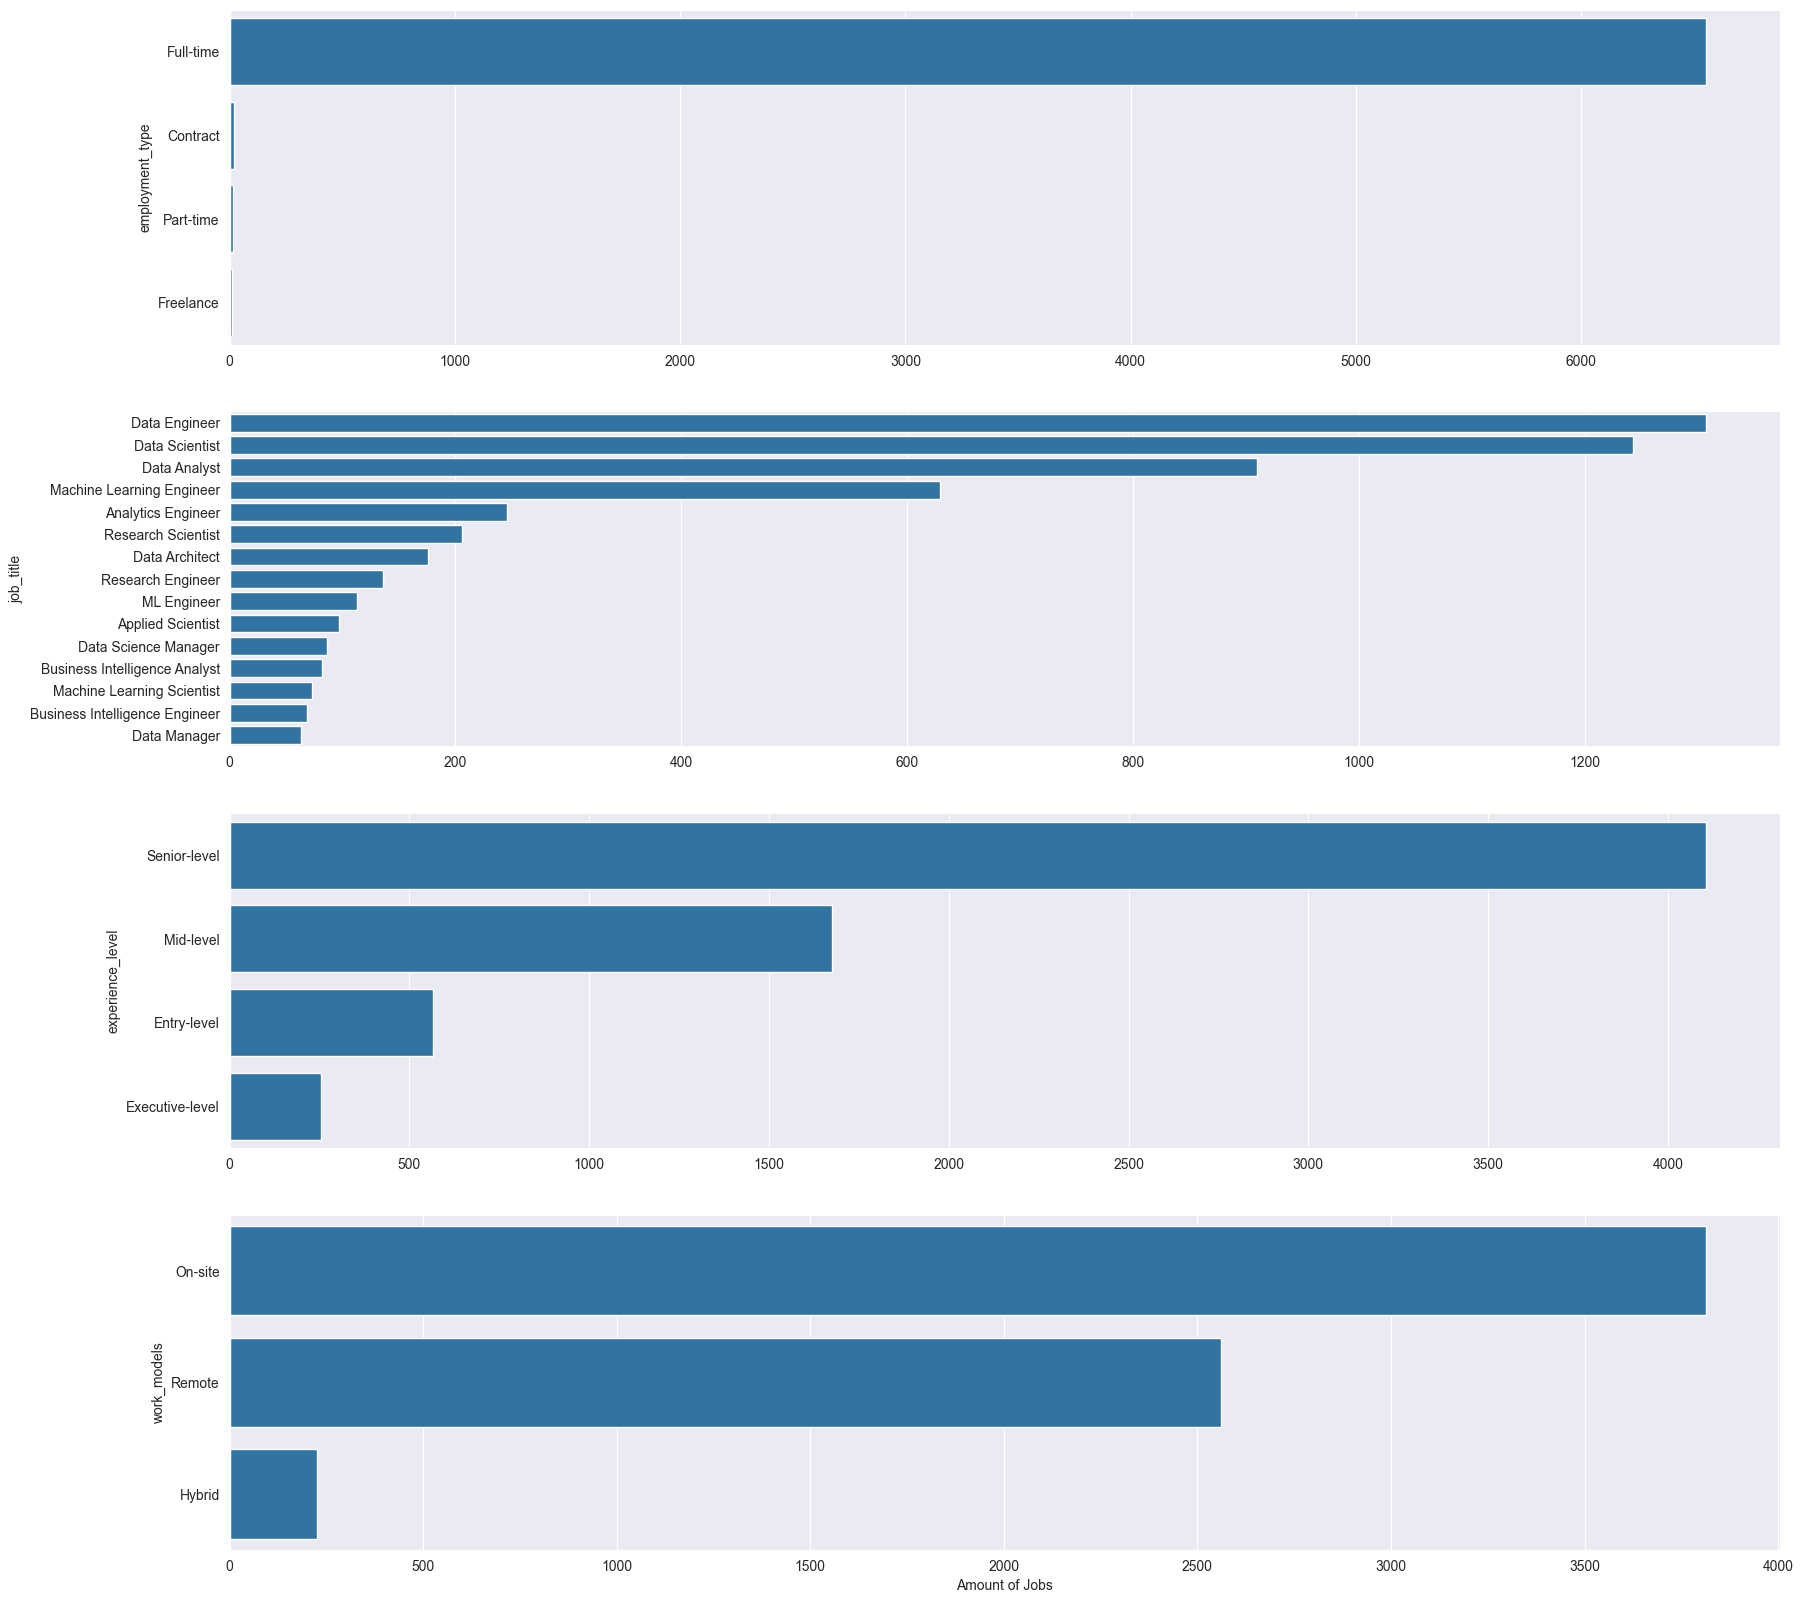

In [4]:
fig,ax = plt.subplots(4,1,figsize=(20,20))

columns_to_show = ['employment_type', 'job_title', 'experience_level', 'work_models']

iter_v = 0

for x in columns_to_show:
    job_counts = data_science_salary[x].value_counts()
    sns.barplot(x=job_counts[0:15].values, y=job_counts[0:15].index, ax=ax[iter_v], orient='h')
    iter_v+=1

    
plt.xlabel('Amount of Jobs')

    



Text(0.5, 0, 'Amount of Jobs')

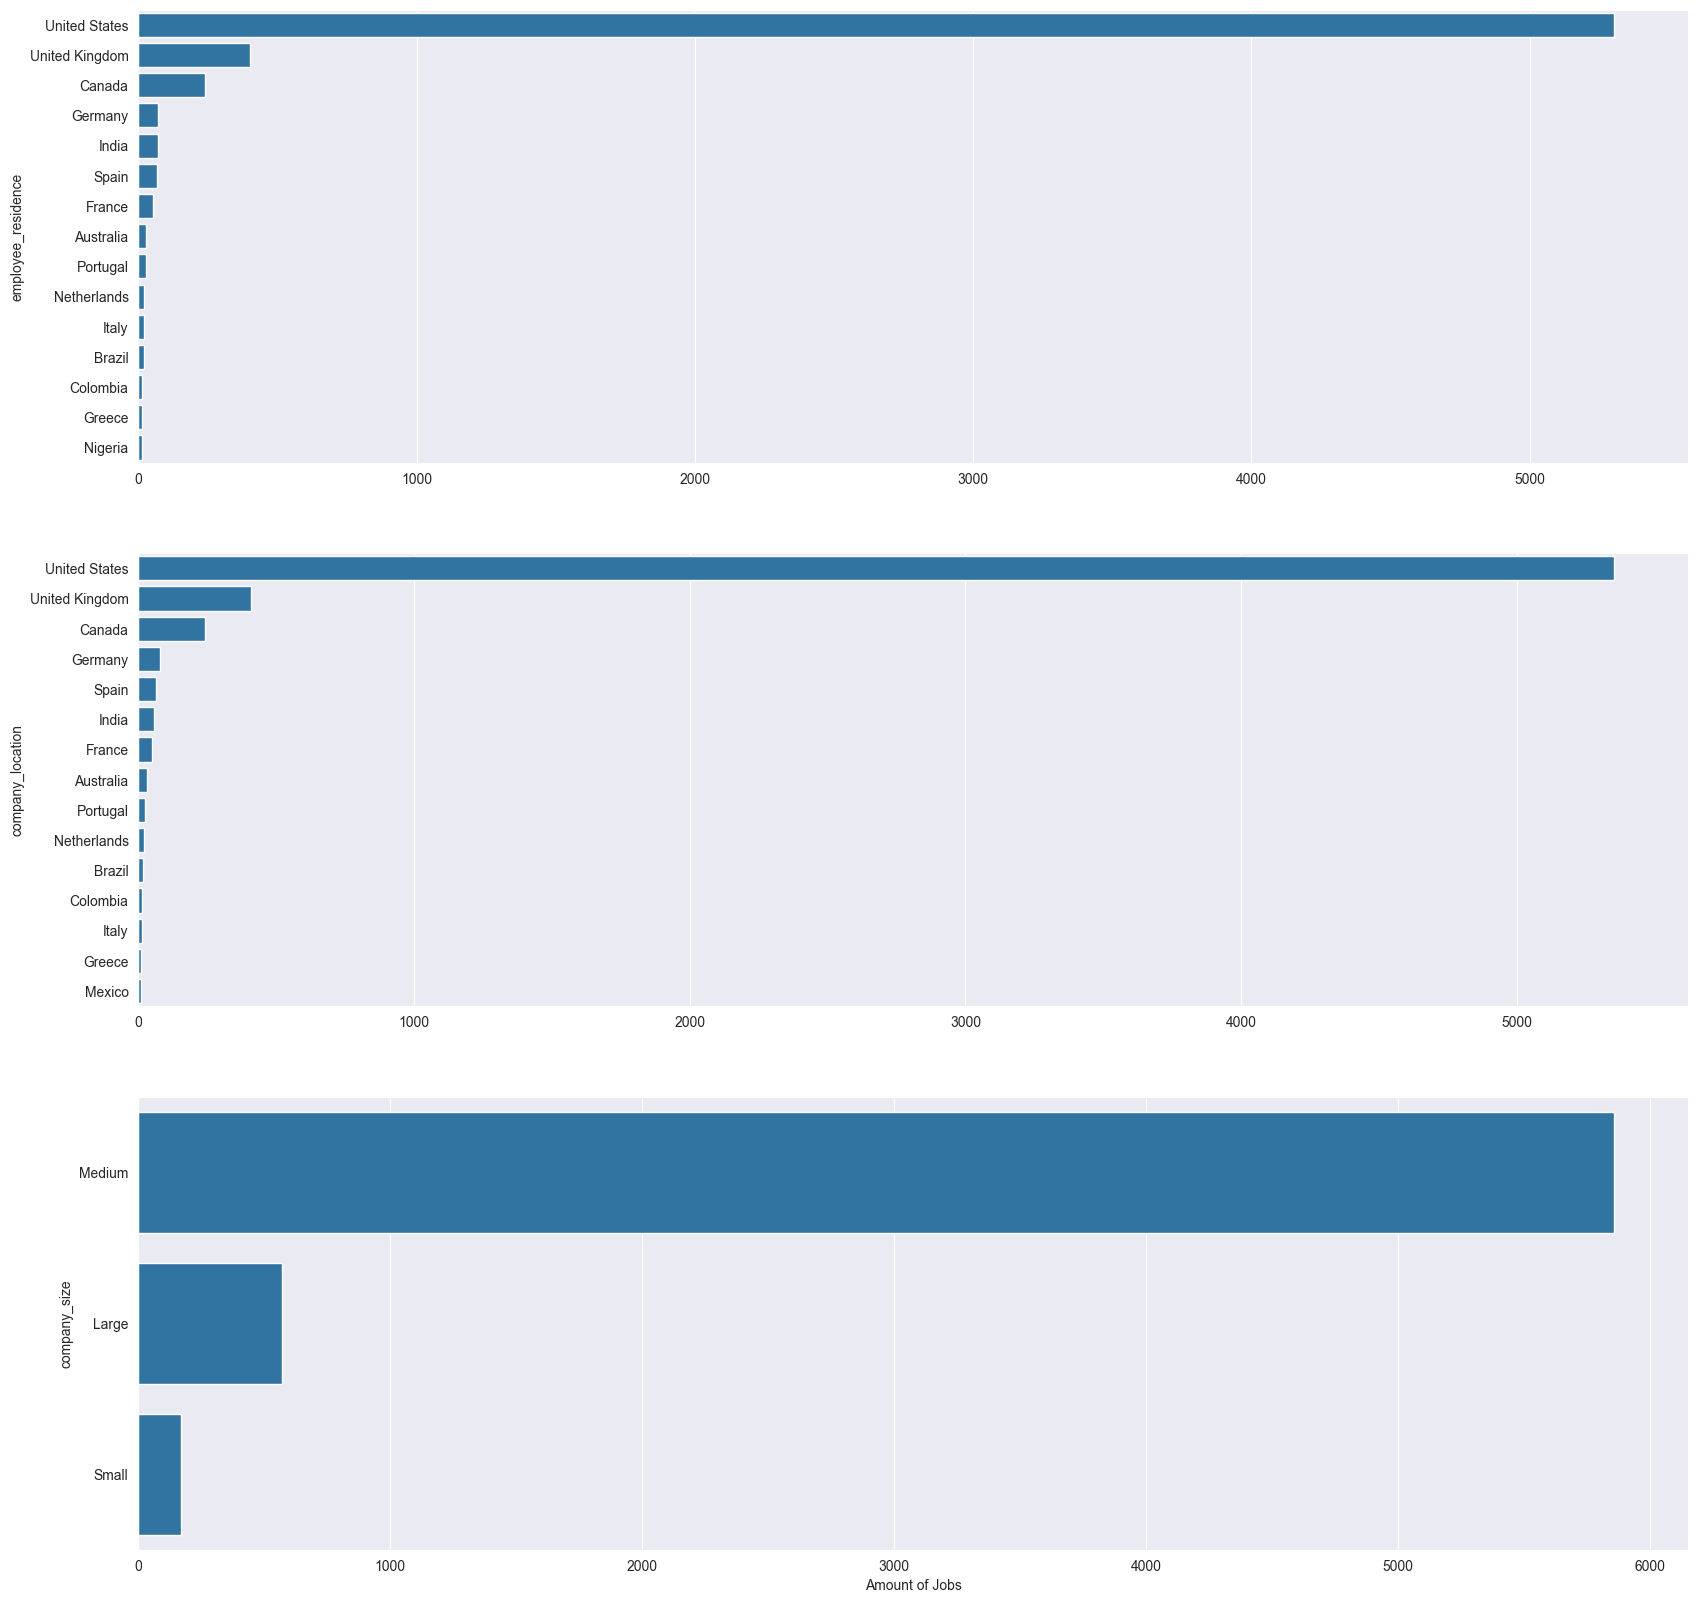

In [5]:
fig,ax = plt.subplots(3,1,figsize=(20,20))

columns_to_show = ['employee_residence', 'company_location', 'company_size' ]

iter_v = 0

for x in columns_to_show:
    job_counts = data_science_salary[x].value_counts()
    sns.barplot(x=job_counts[0:15].values, y=job_counts[0:15].index, ax=ax[iter_v])
    iter_v+=1

    
plt.xlabel('Amount of Jobs')




    


<Axes: ylabel='job_title'>

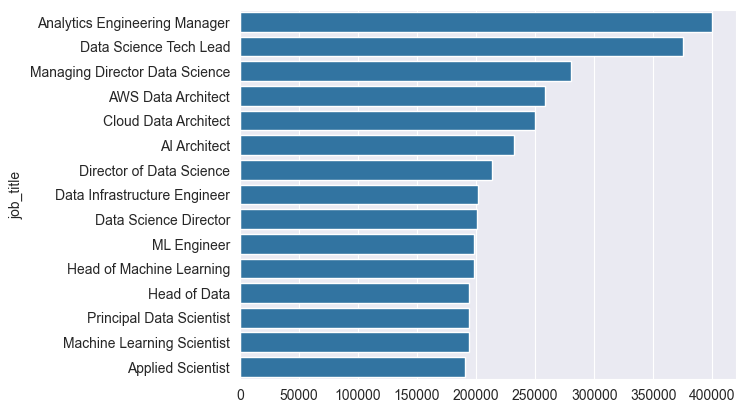

In [34]:


mean_of_salaries_ds = data_science_salary.groupby('job_title')['salary_in_usd'].mean()

mean_salary_by_job_sorted = mean_of_salaries_ds.sort_values(ascending=False)


sns.barplot(x=mean_salary_by_job_sorted[0:15].values.round(2), y=mean_salary_by_job_sorted[0:15].index)

## From looking at all of these we can see that the US is big in positions for Data Science related positions, Data Engineering and Science positions are large as well. They are plentiful available while also not being the total highest paid positions since those are mostly the Head positions in data that rank at the top mostly

## Now lets also look at the salary distributions for five positions

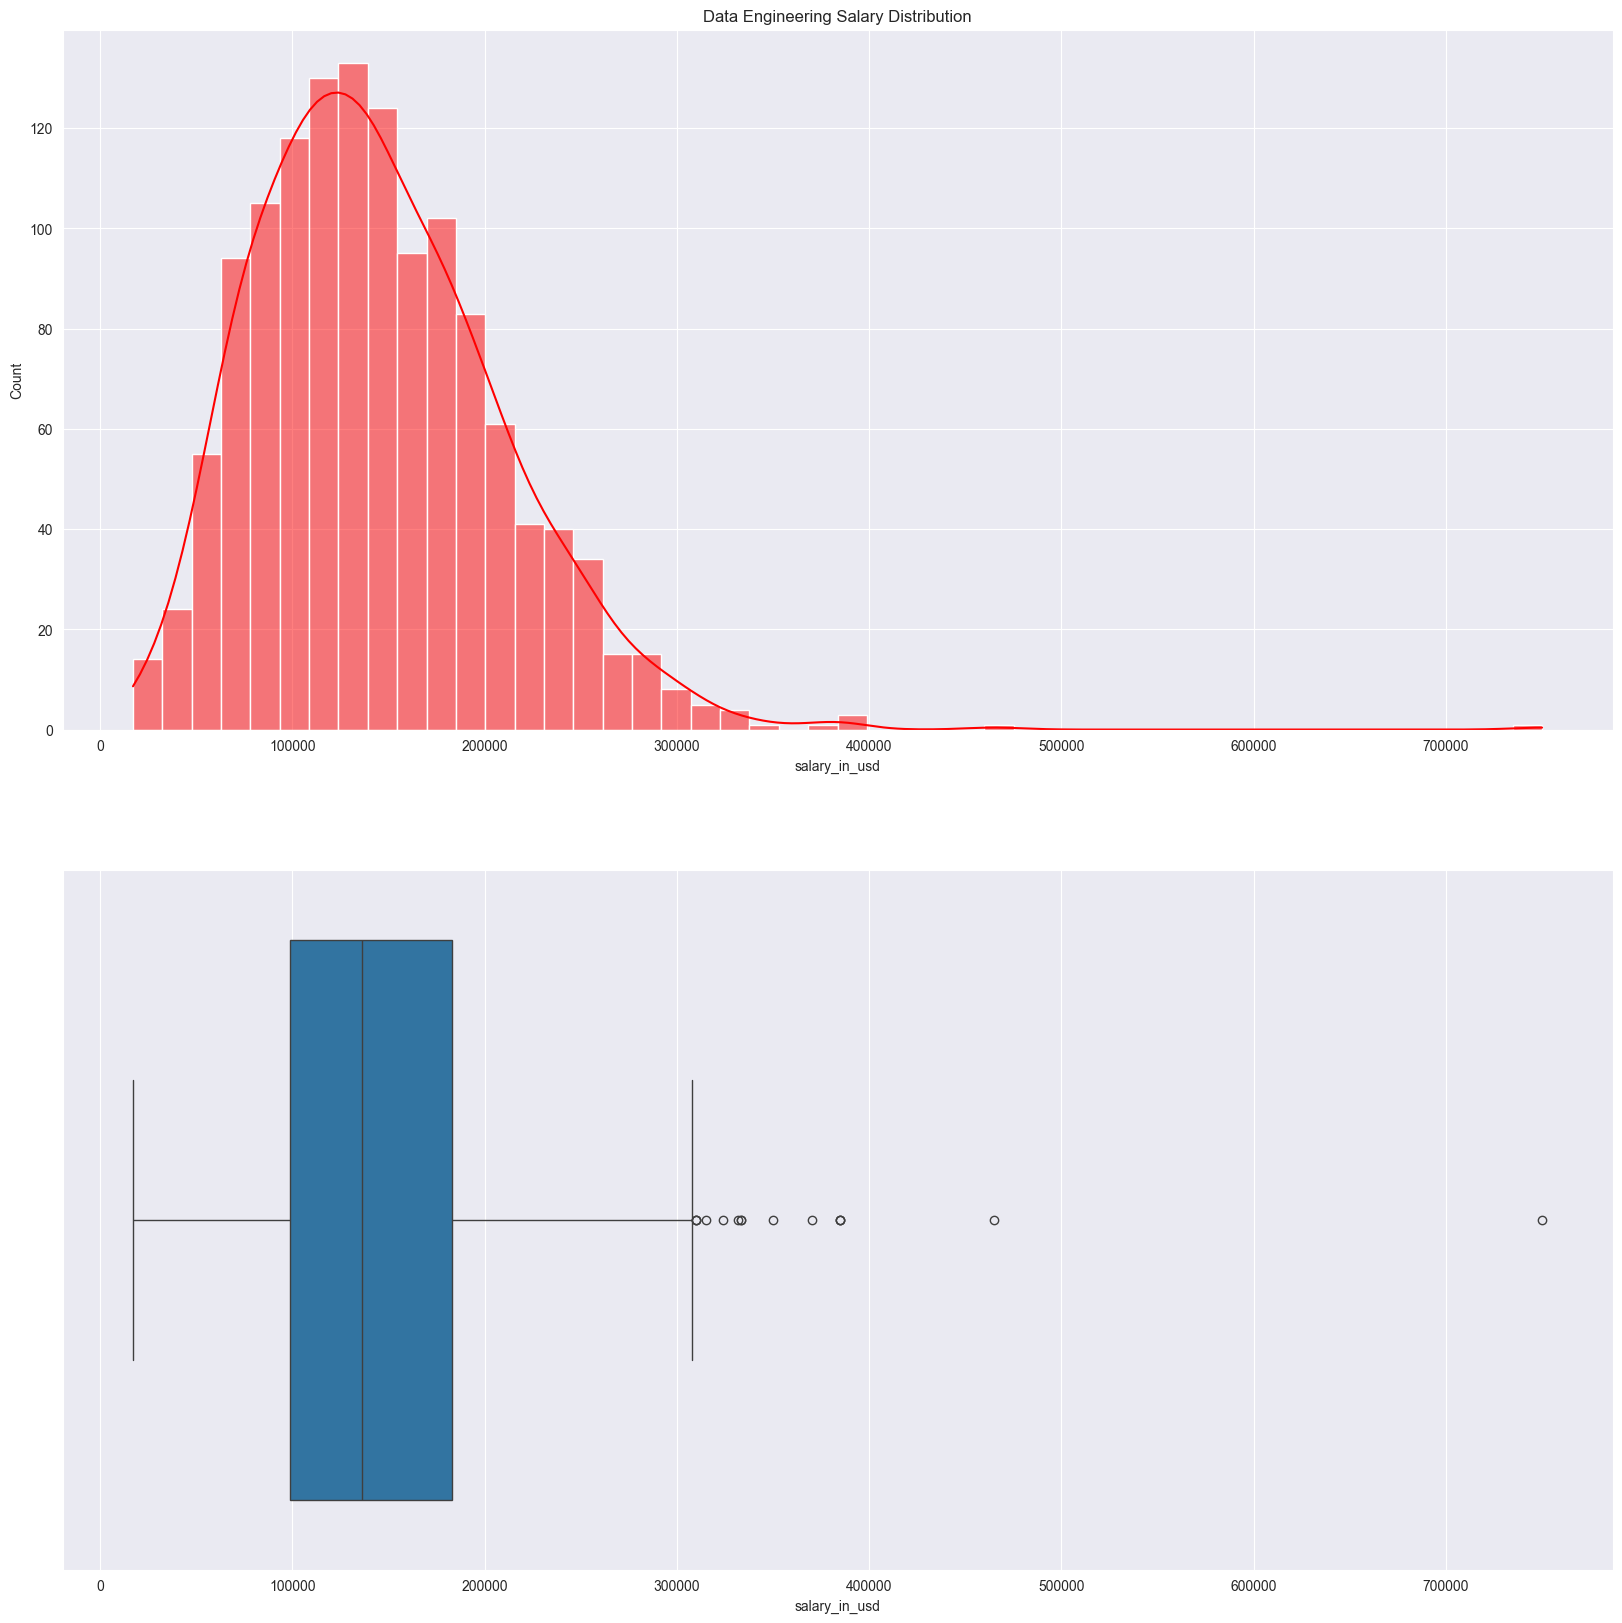

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
ax[0].xaxis.get_major_formatter().set_scientific(False)
ax[0].xaxis.get_major_formatter().set_useOffset(False)
ax[1].xaxis.get_major_formatter().set_scientific(False)
ax[1].xaxis.get_major_formatter().set_useOffset(False)


sns.histplot(data=data_science_salary[data_science_salary['job_title'] == 'Data Engineer'], x='salary_in_usd', kde=True, color='red', ax=ax[0])
sns.boxplot(data=data_science_salary[data_science_salary['job_title'] == 'Data Engineer'], x='salary_in_usd', ax=ax[1])
ax[0].set_title('Data Engineering Salary Distribution')


plt.show()

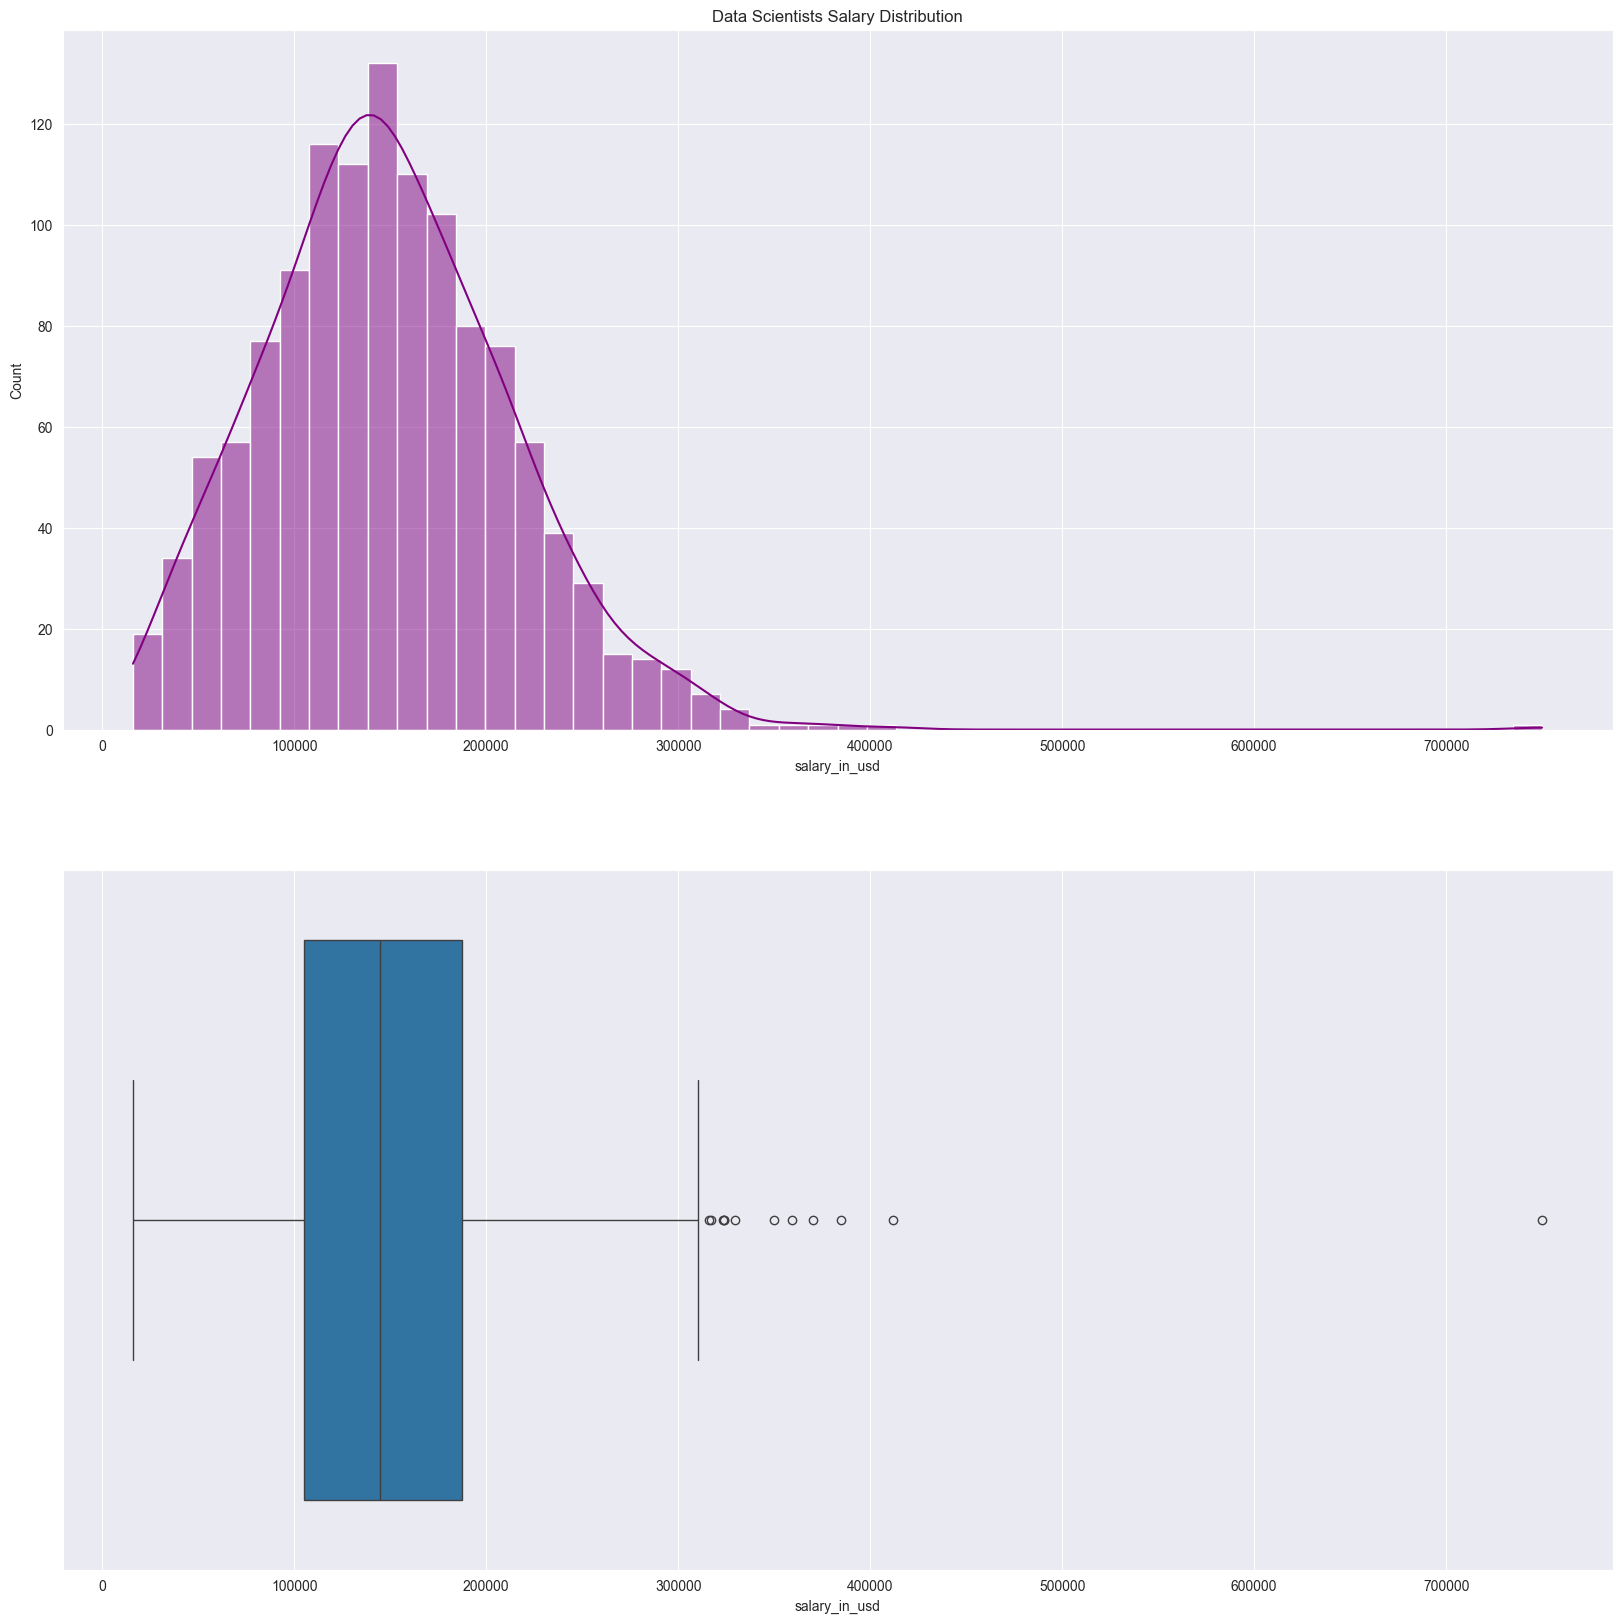

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
ax[0].xaxis.get_major_formatter().set_scientific(False)
ax[0].xaxis.get_major_formatter().set_useOffset(False)
ax[1].xaxis.get_major_formatter().set_scientific(False)
ax[1].xaxis.get_major_formatter().set_useOffset(False)


sns.histplot(data=data_science_salary[data_science_salary['job_title'] == 'Data Scientist'], x='salary_in_usd', kde=True, color='purple', ax=ax[0])
sns.boxplot(data=data_science_salary[data_science_salary['job_title'] == 'Data Scientist'], x='salary_in_usd', ax=ax[1])
ax[0].set_title('Data Scientists Salary Distribution')


plt.show()

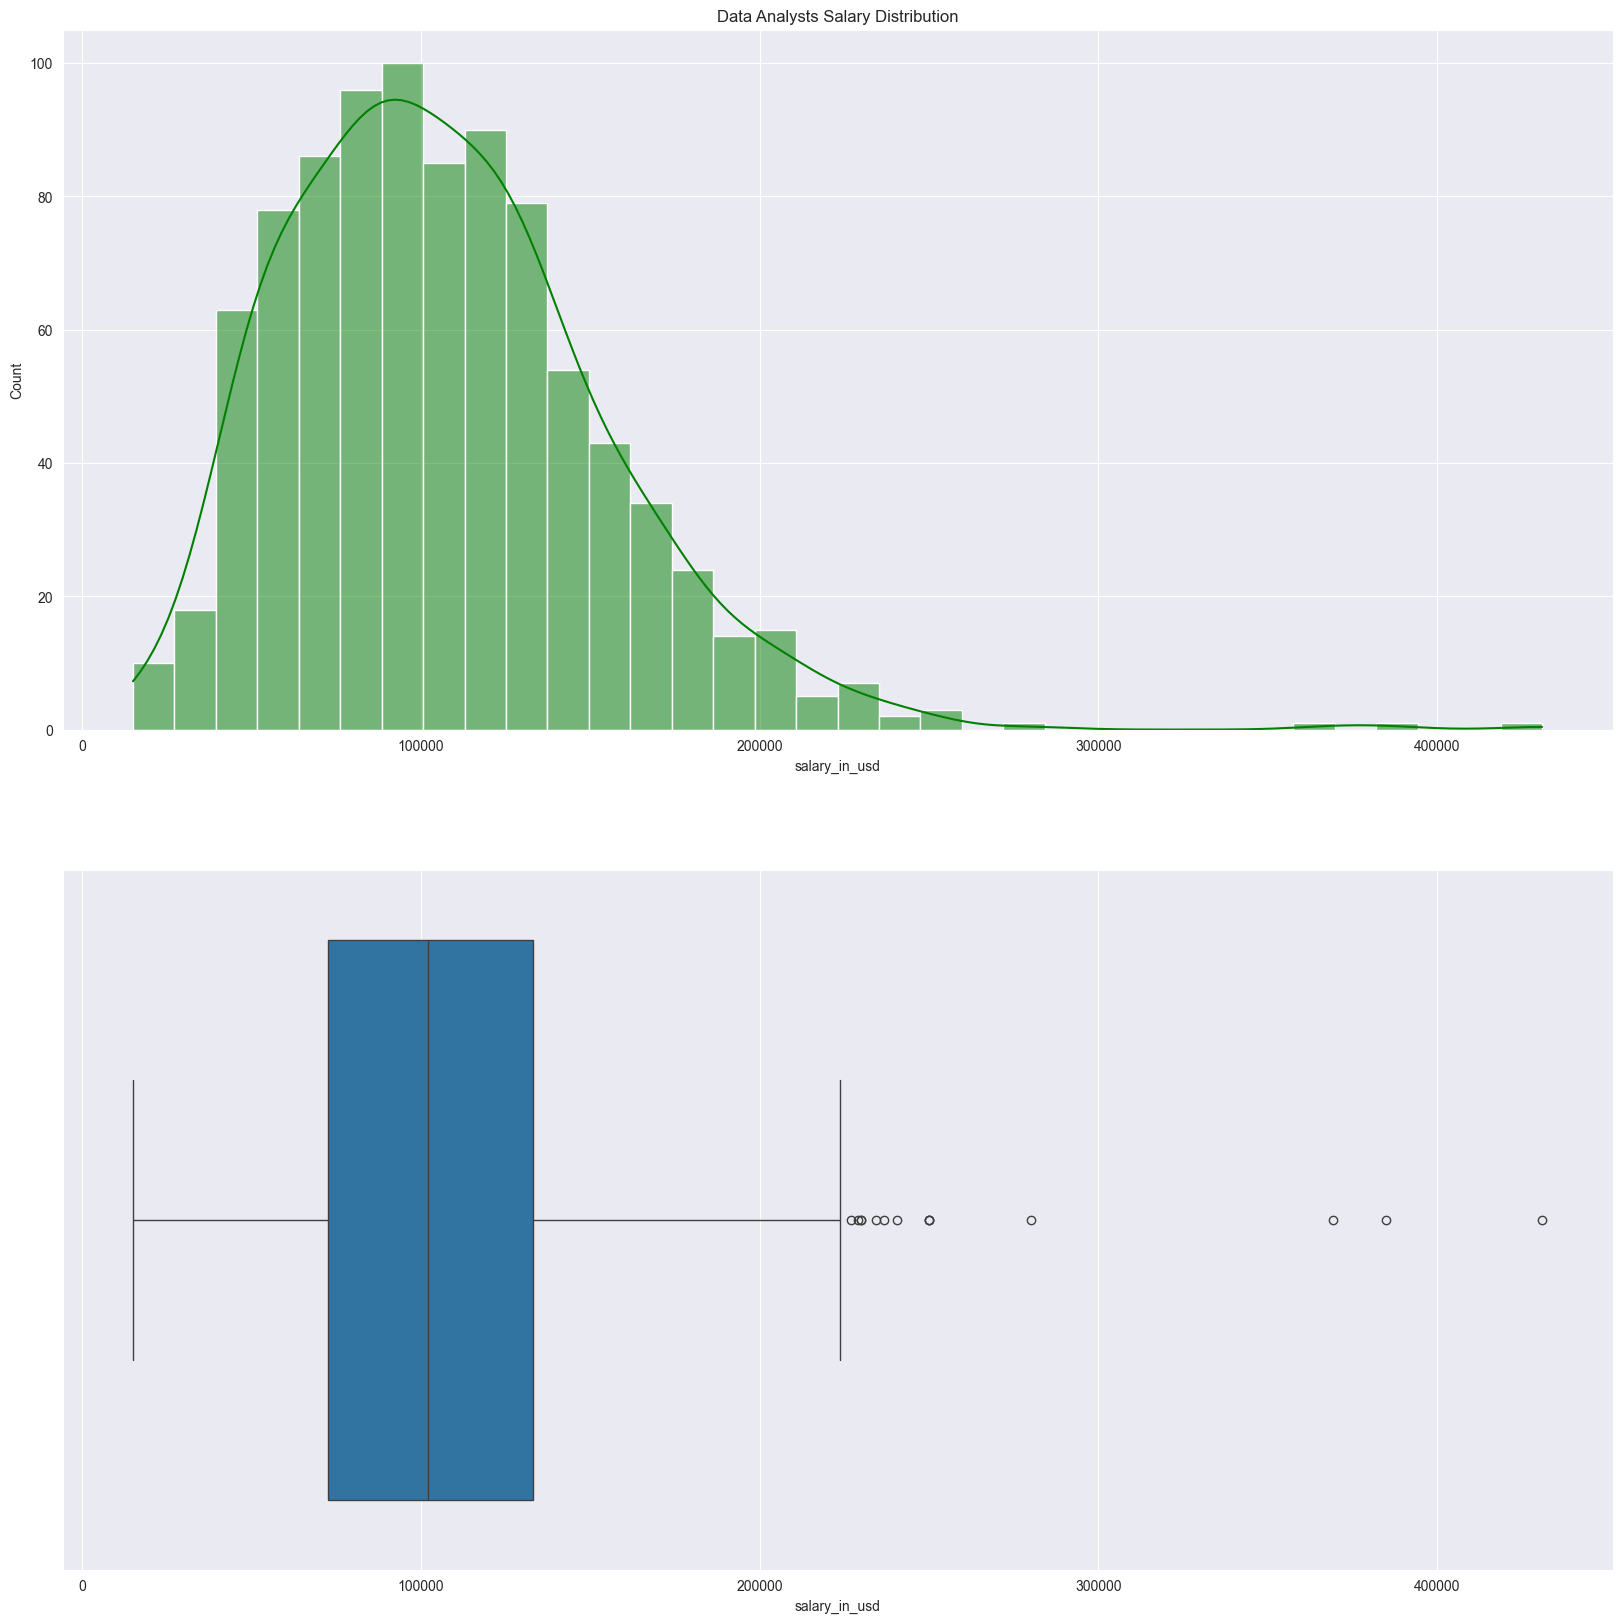

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
ax[0].xaxis.get_major_formatter().set_scientific(False)
ax[0].xaxis.get_major_formatter().set_useOffset(False)
ax[1].xaxis.get_major_formatter().set_scientific(False)
ax[1].xaxis.get_major_formatter().set_useOffset(False)


sns.histplot(data=data_science_salary[data_science_salary['job_title'] == 'Data Analyst'], x='salary_in_usd', kde=True, color='green', ax=ax[0])
sns.boxplot(data=data_science_salary[data_science_salary['job_title'] == 'Data Analyst'], x='salary_in_usd', ax=ax[1])
ax[0].set_title('Data Analysts Salary Distribution')


plt.show()

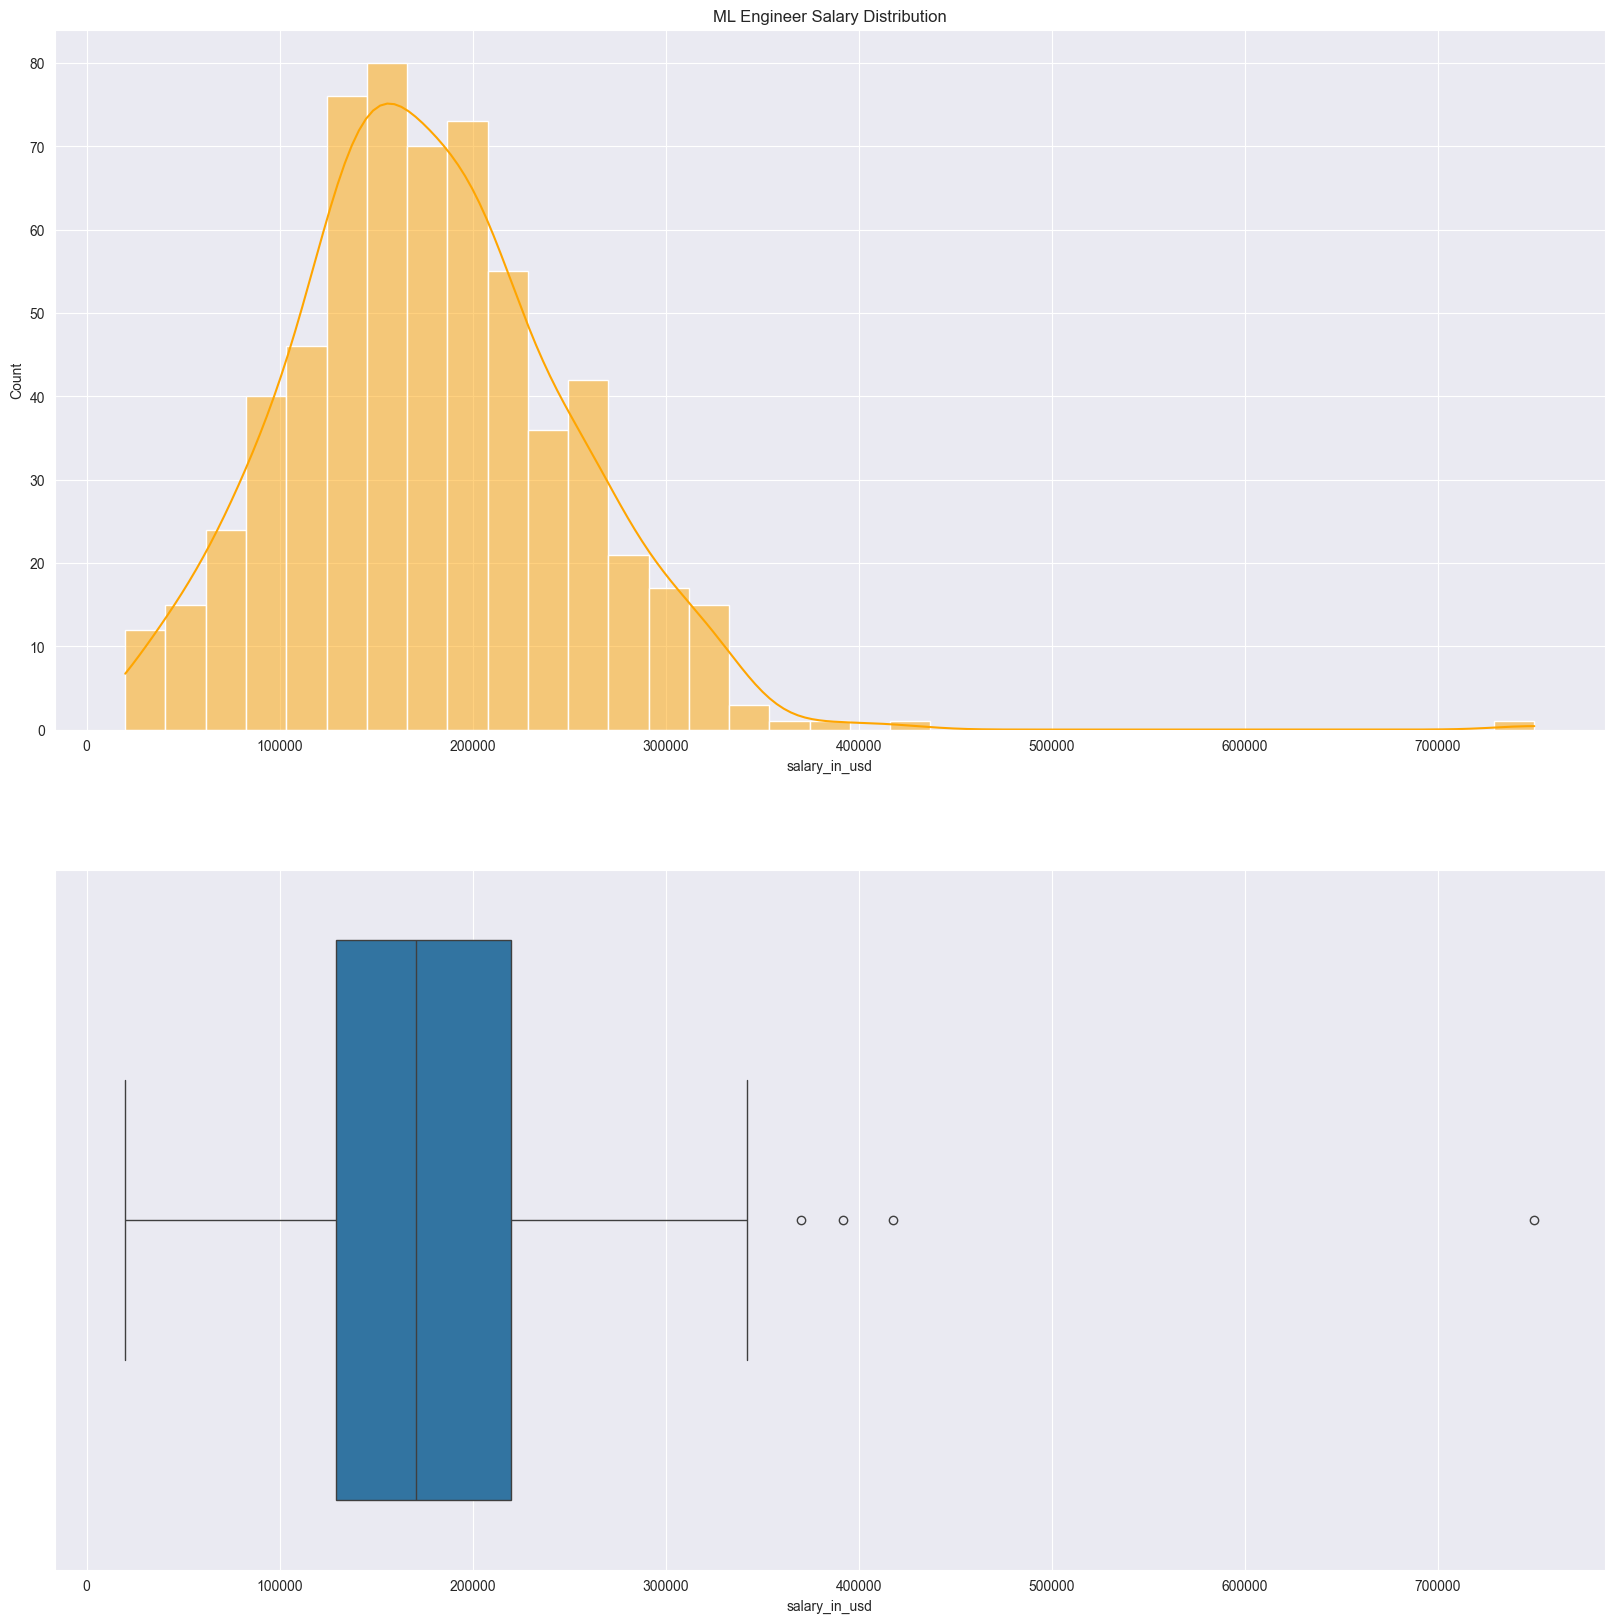

In [38]:

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
ax[0].xaxis.get_major_formatter().set_scientific(False)
ax[0].xaxis.get_major_formatter().set_useOffset(False)
ax[1].xaxis.get_major_formatter().set_scientific(False)
ax[1].xaxis.get_major_formatter().set_useOffset(False)

sns.histplot(data=data_science_salary[data_science_salary['job_title'] == 'Machine Learning Engineer'], x='salary_in_usd', kde=True,
             color='orange', ax=ax[0])
sns.boxplot(data=data_science_salary[data_science_salary['job_title'] == 'Machine Learning Engineer'], x='salary_in_usd', ax=ax[1])

ax[0].set_title('ML Engineer Salary Distribution')

plt.show()

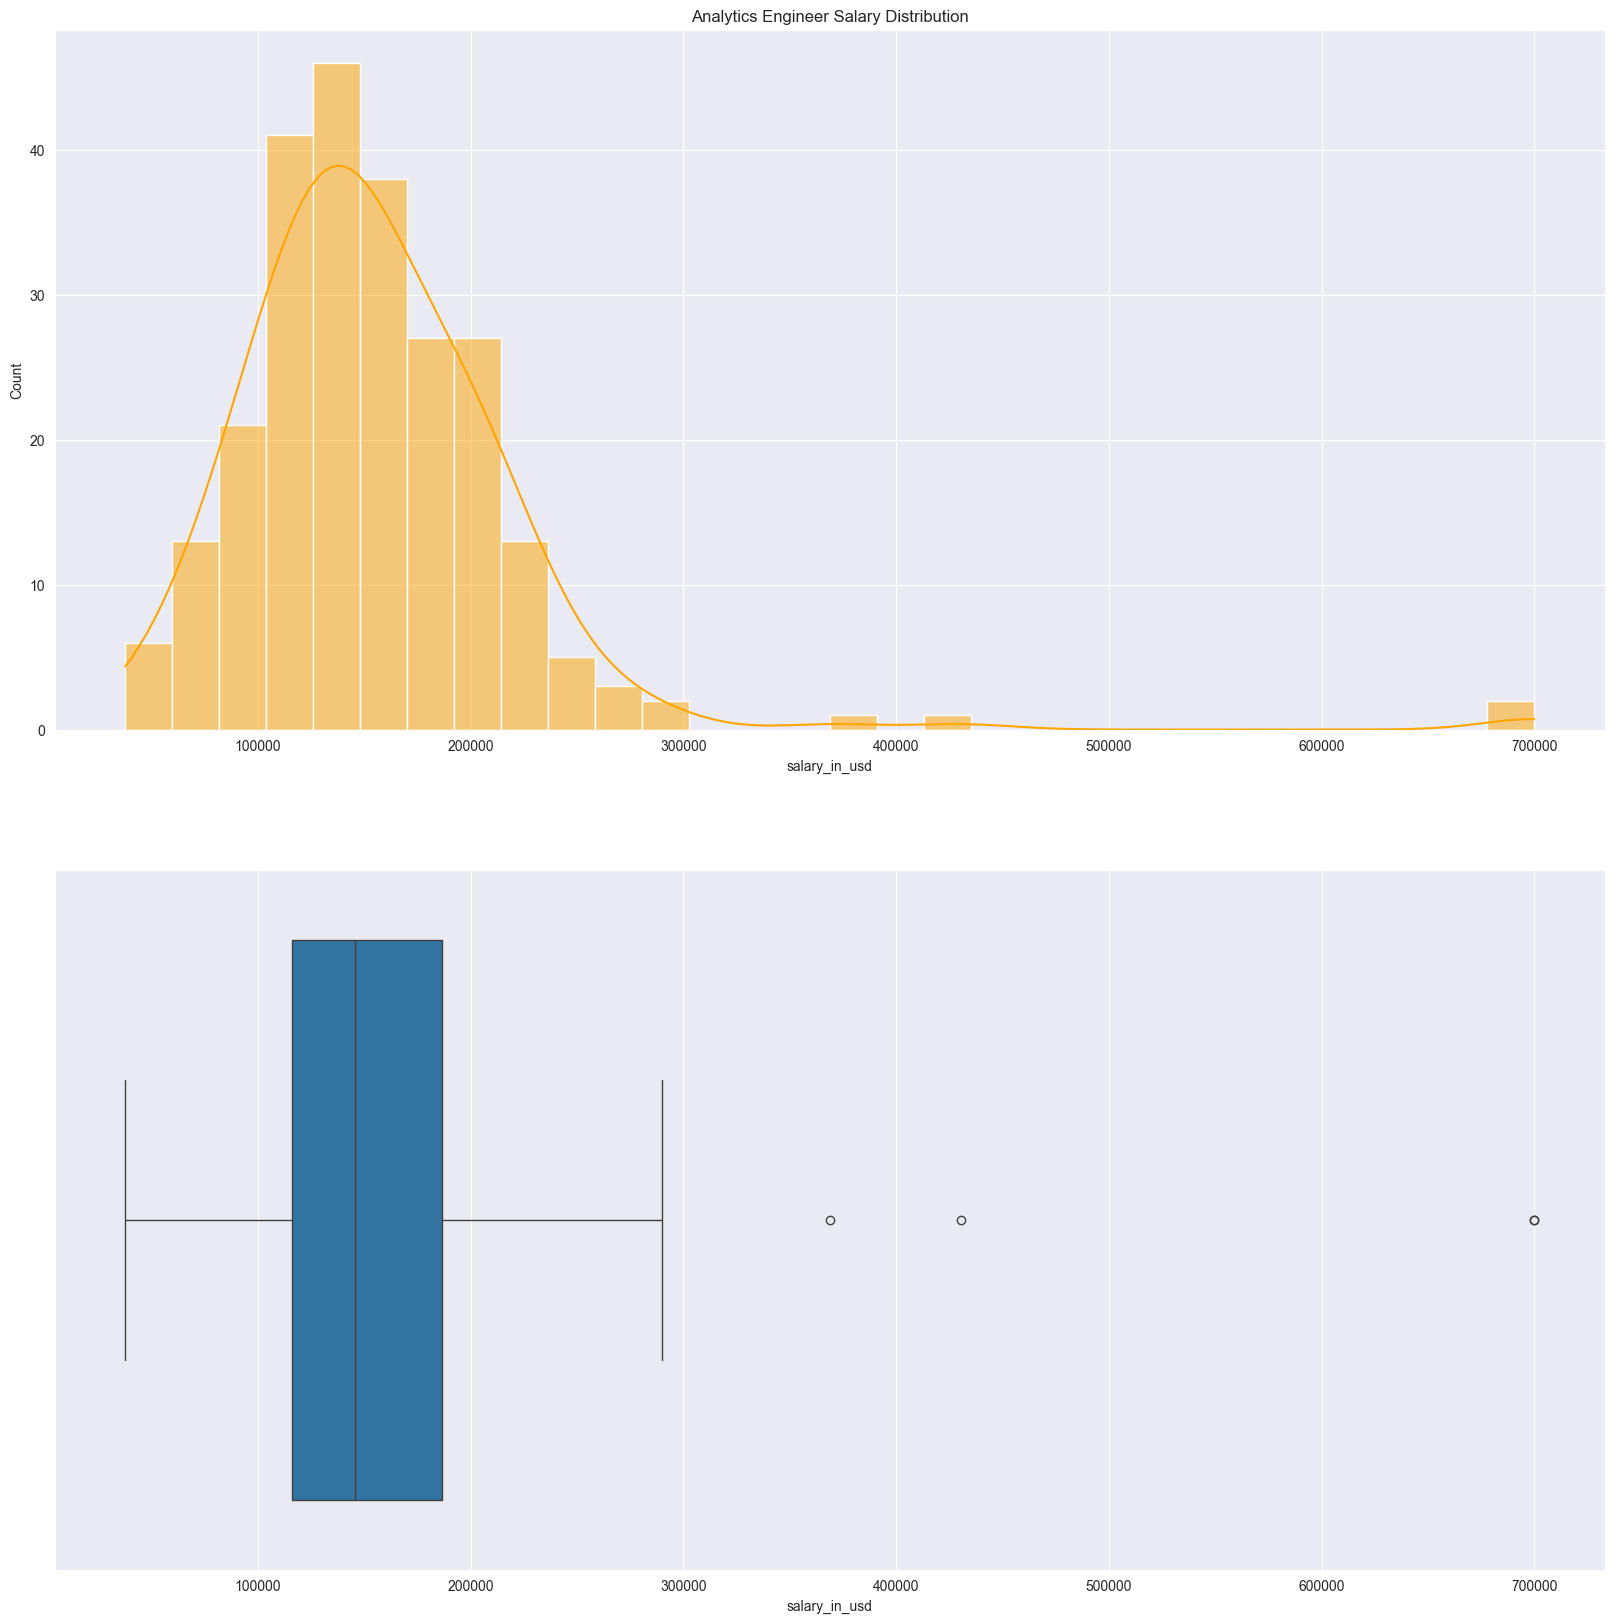

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
ax[0].xaxis.get_major_formatter().set_scientific(False)
ax[0].xaxis.get_major_formatter().set_useOffset(False)
ax[1].xaxis.get_major_formatter().set_scientific(False)
ax[1].xaxis.get_major_formatter().set_useOffset(False)

sns.histplot(data=data_science_salary[data_science_salary['job_title'] == 'Analytics Engineer'], x='salary_in_usd', kde=True,
             color='orange', ax=ax[0])
sns.boxplot(data=data_science_salary[data_science_salary['job_title'] == 'Analytics Engineer'], x='salary_in_usd', ax=ax[1])
ax[0].set_title("Analytics Engineer Salary Distribution")
plt.show()

## From looking at these histograms and box plots we can see that the most available positions have a normal distribution of salary with few hours outside the 25-75% point. This shows that in the market there is a generally agreed upon salary range for these positions depending on the location of the position as well